# Pulizia del dataframe di training


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def mediacol(df):
     for col in df.columns:
        if df[col].dtype == 'object':
            # Converte la notazione scientifica con virgola in punto
            df[col] = df[col].str.replace(',', '.', regex=False)
        # Converte in numerico, gli errori diventano NaN (Not a Number)
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Calcola la media della colonna (ignorando NaN) e arrotonda
        media_col = df[col].mean().round(0)
        
        # Se la media è un numero valido, sostituisce i NaN con la media
        if not np.isnan(media_col):
            df[col] = df[col].fillna(media_col)
    
     return df

def colabs(df):
    for col in df.columns:
        df[col] = df[col].abs()
    return df

def puliziadf(file_path):
    df = pd.read_csv(file_path, sep = ';')
    clean_df = df.copy()
    clean_df= clean_df[clean_df['Label'].notnull() & (clean_df['Label'] != '')] #rimuove le righe con Label nullo o stringa vuota prima di imettere i valori medi
    clean_df = mediacol(clean_df)
    clean_df = colabs(clean_df)
     
    posts_col = '#postshared'
    urls_col = '#urlshared'
    photos_col = '#photos/videos'

    # Evita la divisione per zero. Inizializza le colonne a 0.
    clean_df['fpurls'] = 0.0
    clean_df['fpphotos/videos'] = 0.0
        
    # Calcola la frazione solo dove il numero di post è maggiore di zero
    mask = clean_df[posts_col] > 0
    clean_df.loc[mask, 'fpurls'] = (clean_df.loc[mask, urls_col] / clean_df.loc[mask, posts_col]).round(3)
    clean_df.loc[mask, 'fpphotos/videos'] = (clean_df.loc[mask, photos_col] / clean_df.loc[mask, posts_col]).round(3)
    clean_df.to_csv('clean_manual.csv', sep=';', index=False)

    return clean_df



In [21]:
training_df =pd.read_csv('training.csv', sep=';')
print(f"Dimensioni dataset originale: {training_df.shape}")
print("Anteprima dataset training:")
training_df


Dimensioni dataset originale: (550, 15)
Anteprima dataset training:


,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907.0,200.0,1000,850.0,922.0,49,55,56.0,47.0,40.0,14.0,1
1,2,150,350,30.0,300.0,300,100.0,290.0,33,96,5.0,12.0,10.0,4.0,0
2,3,300,450,50.0,465.0,500,150.0,450.0,2,84,4.0,15.0,15.0,7.0,0
3,4,25,110,660.0,350.0,2050,2000.0,2050.0,"9,76E+13",1,7.0,3.0,54.0,21.0,1
4,5,24,100,150.0,800.0,950,1000.0,900.0,"1,05E+13","9,47E+13",66.0,5.0,55.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,547,48,33,965.0,1298.0,1987,1456.0,1982.0,"7,33E+13","9,97E+13",1.0,491.0,46.0,22.0,1
546,548,45,44,987.0,2000.0,3038,2030.0,3030.0,"6,68E+13","9,97E+13",102.0,492.0,45.0,29.0,1
547,549,43,55,1156.0,2489.0,3346,2410.0,3345.0,"7,20E+13","1,00E+13",103.0,49.0,46.0,25.0,1
548,550,23,67,1489.0,2132.0,3126,2130.0,3120.0,"6,81E+13","9,98E+13",92.0,48.0,47.0,22.0,1


In [22]:
training_clean = puliziadf('manuale.csv')


training_clean 


,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.850,0.922,56,47,40,14,1
1,2,150,350,30,300,300,100,290,0.333,0.967,5,12,10,4,0
2,3,300,450,50,465,500,150,450,0.300,0.900,4,15,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.976,1.000,7,3,54,21,1
4,5,24,100,150,800,950,1000,900,1.053,0.947,66,5,55,20,1
5,6,562,350,55,650,450,250,900,0.556,2.000,42,22,15,10,0
6,7,662,454,22,764,365,100,1000,0.274,2.740,31,25,23,10,0
7,8,50,100,700,350,2512,2000,2400,0.796,0.955,77,32,58,32,1
8,9,800,550,66,850,460,500,300,1.087,0.652,4,2,23,10,0
9,10,605,555,58,782,700,100,650,0.143,0.929,24,28,13,5,0


       #friends  #following  #community  #postshared  #urlshared  \
count     25.00       25.00       25.00        25.00       25.00   
mean     646.64      386.00      138.08       593.24      319.68   
std      564.20      235.87      238.13       568.92      563.04   
min       24.00       56.00       13.00        76.00       23.00   
25%      150.00      164.00       30.00       300.00       50.00   
50%      605.00      380.00       55.00       450.00       95.00   
75%      864.00      550.00       84.00       700.00      150.00   
max     2461.00      975.00      907.00      2512.00     2000.00   

       #photos/videos  avgcomment/post  likes/post  tags/post  #tags/post  
count           25.00            25.00       25.00      25.00       25.00  
mean           603.12            51.44       17.08      26.36       14.00  
std            562.27            91.78       10.54      13.27        6.16  
min             65.00             1.00        1.00      10.00        4.00  
25%    

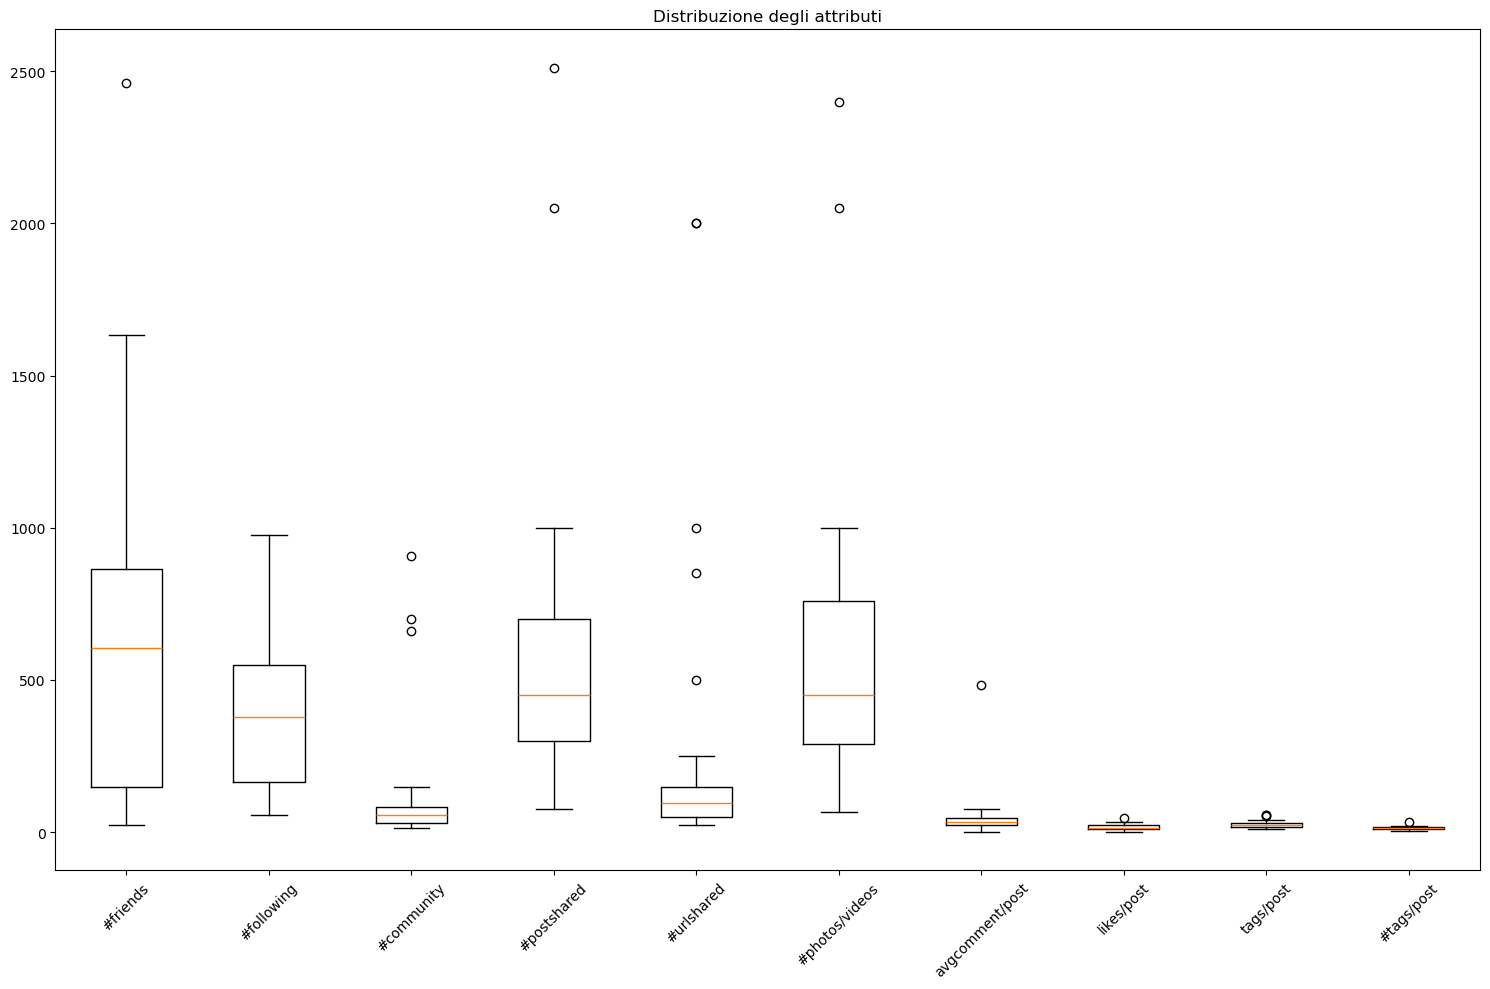

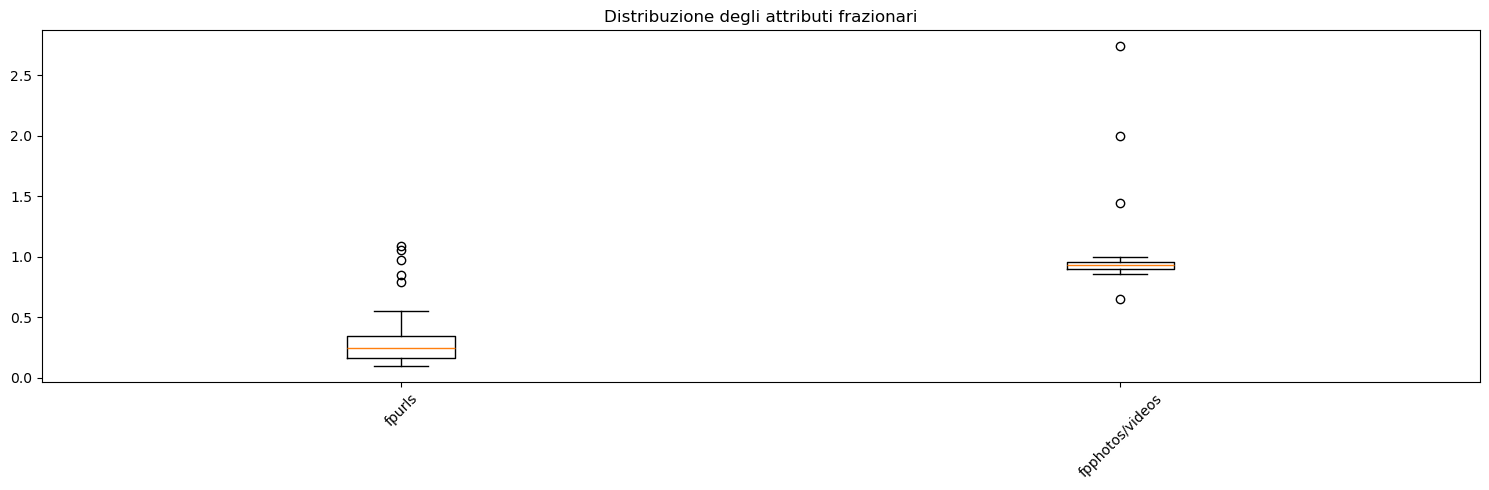

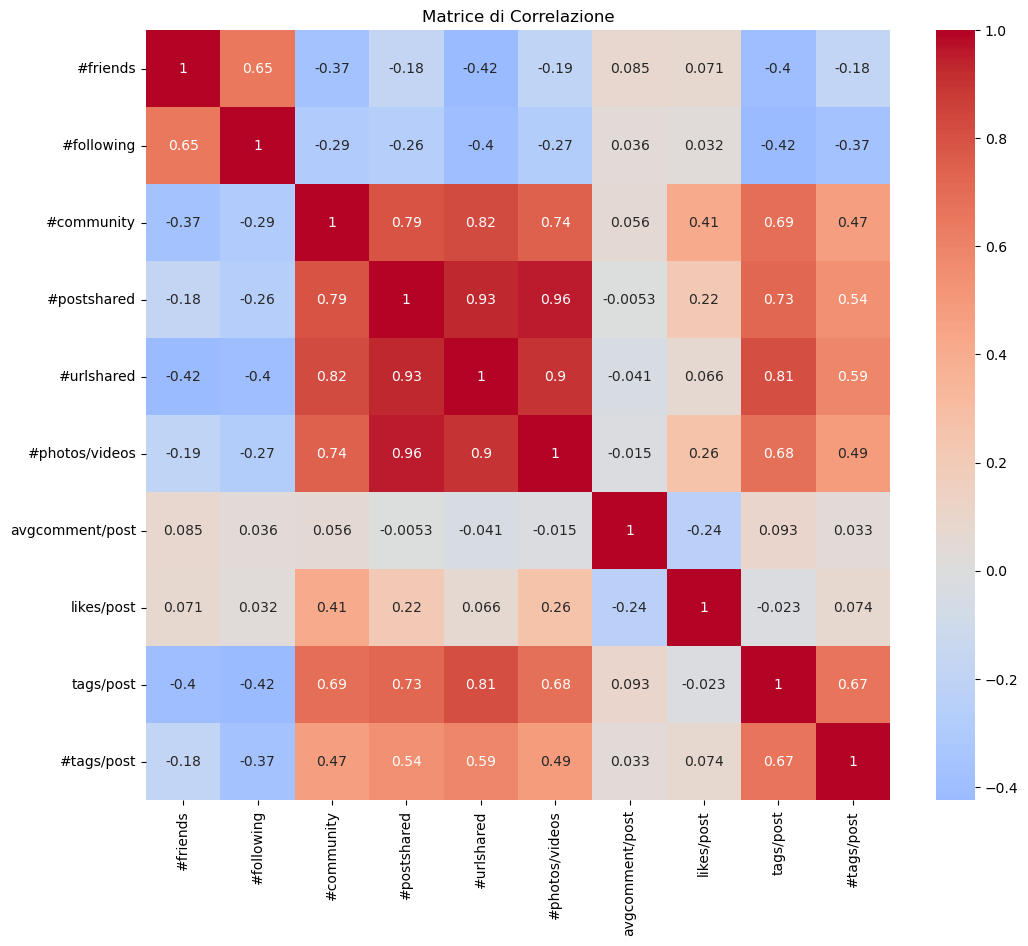

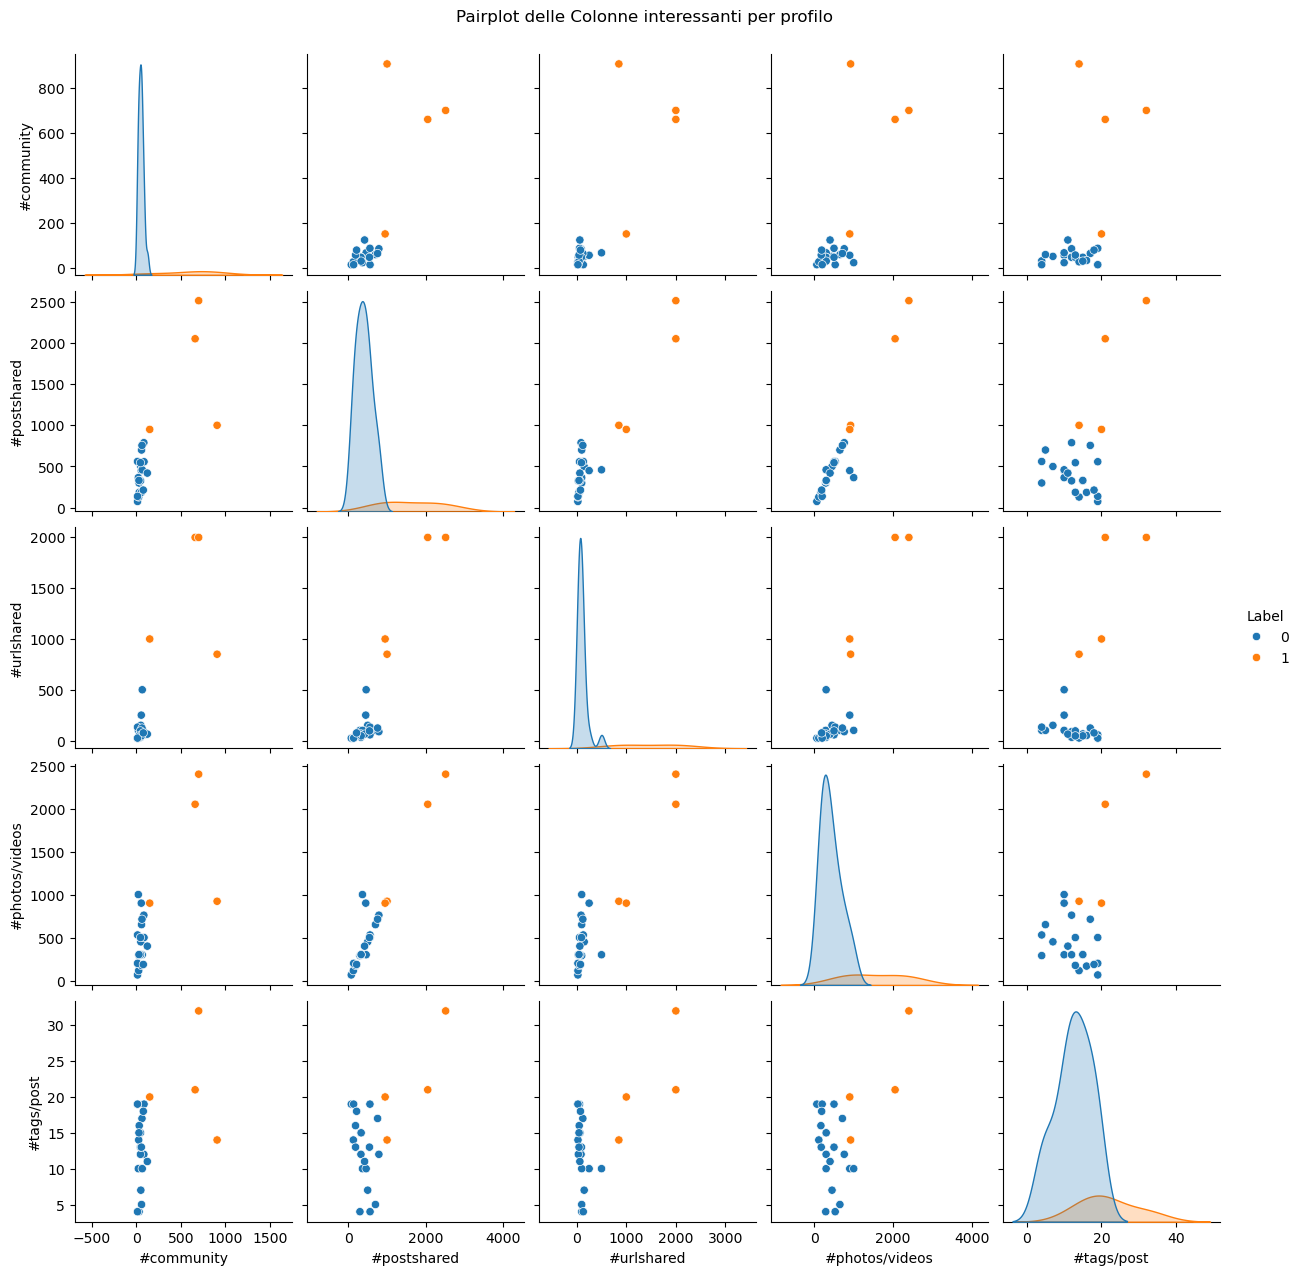

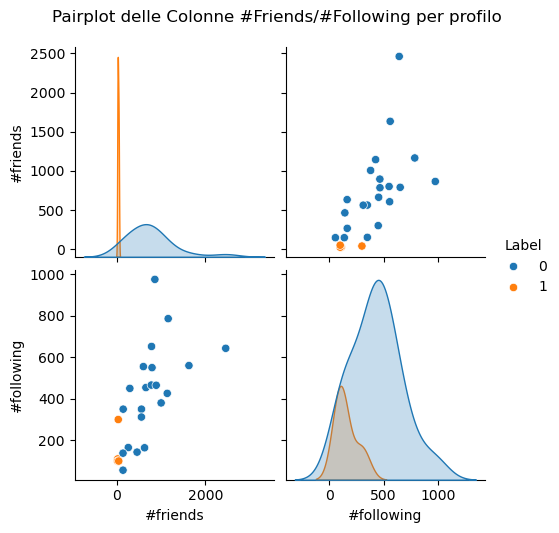

In [23]:
# 1. Boxplot
numeric_features = ['#friends', '#following', '#community', '#postshared', '#urlshared', '#photos/videos', 'avgcomment/post', 'likes/post', 'tags/post', '#tags/post']
fractions = ['fpurls', 'fpphotos/videos']
print(training_clean[numeric_features].describe().round(2))
plt.figure(figsize=(15, 10))
plt.boxplot([training_clean[feature] for feature in numeric_features])
plt.title('Distribuzione degli attributi')
plt.xticks(ticks=range(1, len(numeric_features) + 1), labels=numeric_features, rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.boxplot([training_clean[fraction] for fraction in fractions])
plt.title('Distribuzione degli attributi frazionari')
plt.xticks(ticks=range(1, len(fractions) + 1), labels=fractions, rotation=45)
plt.tight_layout()
plt.show()


# 2. Matrice di correlazione
plt.figure(figsize=(12, 10))
corr_matrix = training_clean[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione')
plt.show()

# 3. Pairplot per le feature principali dalla matrice di correlazione

# Pairplot delle principali feature
intersentig_col= ['#community', '#postshared', '#urlshared', '#photos/videos', '#tags/post']
friend_follow_col = ['#friends', '#following']
sns.pairplot(training_clean[intersentig_col + ['Label']], hue = 'Label')
plt.suptitle('Pairplot delle Colonne interessanti per profilo', y=1.02)
plt.show()
sns.pairplot(training_clean[friend_follow_col+ ['Label']], hue = 'Label')
plt.suptitle('Pairplot delle Colonne #Friends/#Following per profilo', y = 1.05)
plt.show()

